# <center><b> PROGETTO FINALE DATA ANALYSIS</b>

### <div style="text-align: right"> Sebastiano Fabbri </div>

### **Per visualizzare correttamente i grafici usare JupyterLab**

In questo notebook analizzerò un dataset relativo agli utenti di un'applicazione di ricette plant based. <br>
La dieta vegana ha un minore impatto sull’ambiente, quella che consuma meno risorse naturali (acqua, energia, suolo).<br>
Consapevoli di cio, sempre più persone sono interessate a questo tipo di alimentazione.<br>
## __OBIETTIVI__
Esplorare il dataset per ottenere una panoramica del comportamento degli utenti.

# Contenuti

1. [Identificazione obiettivi](#1.-Identificazione-obiettivi)

2. [Selezione Dati](#2.-Selezione-Dati)

3. [Pulizia dati](#3.-Pulizia-Dati)

4. [Esplorazione Dati & Visualizzazioni](#4.-Esplorazione-Dati-&-Visualizzazioni)

    4.1 [Analisi chef](#4.1.-Analisi-chef) 
    
    4.2 [Analisi temporali](#4.2.-Analisi-temporali) 
    
    4.3 [Analisi utenti nazionalità spagnola](#4.3.-Analisi-utenti-nazionalità-spagnola) 
    
    4.4 [Analisi miglior utente](#4.4.-Analisi-miglior-utente)  
    
5. [Conclusioni](#5.-Conclusioni)

---
---

## 1. Identificazione obiettivi

Abbiamo una nuova community in cui ogni giorno vengono pubblicate da diversi chef delle ricette plant based, che gli utenti possono replicare e pubblicare sulla propria pagina. 

Useremo il dataset per fornire una visione d'insieme sull'attivita degli utenti e scoprire comportamenti o preferenze comuni

### Alcune domande a cui cercheremo di dare una risposta

 - Quanti utenti sono registrati?

 - Categorie di ricette più presenti

 - Distribuzione livello di difficoltà delle ricette

 - Stumento utilizzato per visualizzare le ricette

 - Trend iscrizioni utenti

 - Qual' è lo chef con più ricette

---
---
## 2. Selezione Dati

Il progetto utilizza un solo dataset:

 - Food_Data.csv, fornito dai coach del corso Data Analysis di start2impact

>Scaricare il dataset al link sottostante e inserirlo nella cartella 'data'

>[Dataset](https://drive.google.com/file/d/1dJ0NnVsQQoJ6UFcSRZt5Bjo-ZyxG8Imn/view)

### Caricamento librerie e dati

In [ ]:
# importiamo le librerie che ci servono per esplorare i dati e visualizzarli tramite grafici

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_row', None)

%matplotlib inline

In [ ]:
# assegnamo il dataset ad una variabile

df = pd.read_csv('./data/Food_Data.csv',sep=';', dtype={'level': str})   # la colonna level contiene valori di tipo misto. con dtype selezioniamo il type prima di aprire il dataframe  
df.head()

---
---
## 3. Pulizia dati

Puliamo e prepariamo i dati del dataset

In [5]:
# la colonna 'id' e 'recipe_id' sembrano uguali
# controllo valori nelle colonne 'id' e 'recipe_id'

df['recipe_id'].equals(df['id'])

True

In [6]:
# possiamo eliminare la colonna 'Unnamed', 'id'

df.drop(['Unnamed: 0','id'], axis=1, inplace=True)

In [7]:
df.shape

(2170218, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2170218 entries, 0 to 2170217
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   cooking_date       object 
 1   user_uuid          object 
 2   category           object 
 3   chef_id            int64  
 4   language           object 
 5   level              object 
 6   challenge_id       float64
 7   country            object 
 8   subscription_date  object 
 9   platform           object 
 10  recipe_id          int64  
 11  stars              float64
dtypes: float64(2), int64(2), object(8)
memory usage: 198.7+ MB


Verifichiamo la presenza di valori mancanti 

In [10]:
# percentuale valori mancanti

missing_val_count = df.isnull().sum()/len(df)*100
missing_val_count.round(2)

cooking_date          0.00
user_uuid             0.00
category              0.00
chef_id               0.00
language              0.00
level                55.67
challenge_id         95.50
country               0.00
subscription_date    12.76
platform              0.03
recipe_id             0.00
stars                 0.00
dtype: float64

<Figure size 720x432 with 0 Axes>

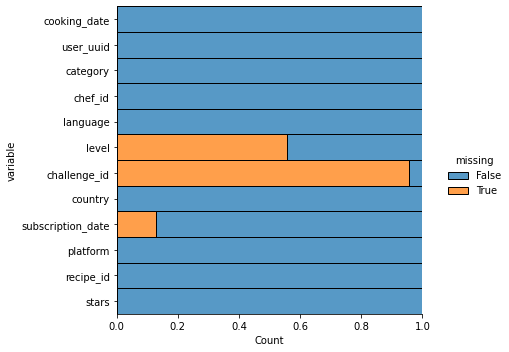

In [11]:
#Visualizing missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25)
plt.show()

Le colonne contenenti valori mancanti sono:

 - level (livello di difficoltà della ricetta)
 - challenge_id (Identificativo della challenge)
 - subscription_date (Giorno in cui l’utente si è iscritto)
 
Procediamo con l'eliminazione della colonna challenge_id, in quanto non riusciamo ad ottenere nessuna informazione utile

In [ ]:
# eliminiamo la colonna challenge_id (95% dati mancanti)

df.drop(['challenge_id'], axis=1, inplace=True)

---
---
## 4. Esplorazione Dati & Visualizzazioni

In questa parte del notebook esploriamo i dati del dataset e visualizziamo le informazioni che riteniamo più interessanti

In [12]:
# totale numero utenti unici

df.user_uuid.nunique()

78769

In [13]:
# numero totali ricette

df.recipe_id.nunique()

9930

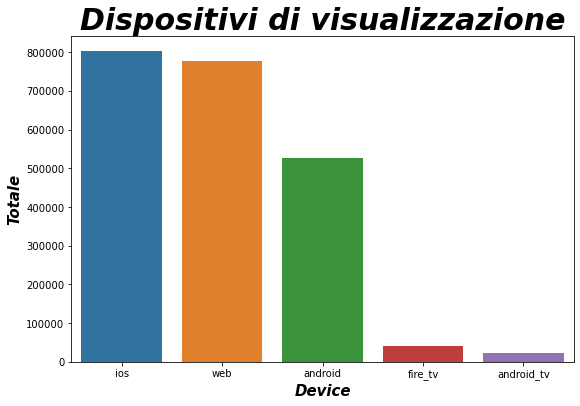

In [14]:
# countplot platform (dispositivi di visualizzazione delle ricette)

fig, ax = plt.subplots(1,1, figsize=(9,6))
data = df
sns.countplot(x ='platform', data = data, order = df['platform'].value_counts().index)

ax.set_title('Dispositivi di visualizzazione', size=30, fontstyle='italic', weight=900)
ax.set_xlabel('Device', size=15, fontstyle='italic', weight=900)
ax.set_ylabel('Totale', size=15, fontstyle='italic', weight=900)

plt.show()

Il grafico disegna uno scenario chiaro dei dispositivi usati dagli utenti su cui guardano i video delle ricette

In [15]:
df.platform.value_counts()

ios           802622
web           776561
android       527924
fire_tv        39833
android_tv     22669
Name: platform, dtype: int64

In [16]:
# distribuzione percentuale livelli difficoltà

df.level.value_counts(normalize=True).round(2)*100

intermediate    82.0
beginner        14.0
advanced         4.0
Name: level, dtype: float64

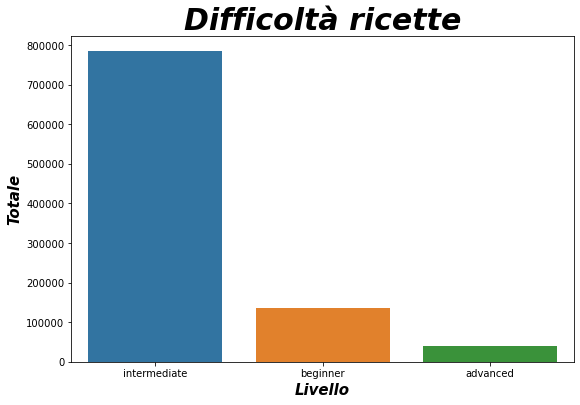

In [17]:
# barplot difficoltà ricette

fig, ax = plt.subplots(1,1, figsize=(9,6))
data = df
sns.countplot(x ='level', data = data, order = df['level'].value_counts().index)

ax.set_title('Difficoltà ricette', size=30, fontstyle='italic', weight=900)
ax.set_xlabel('Livello', size=15, fontstyle='italic', weight=900)
ax.set_ylabel('Totale', size=15, fontstyle='italic', weight=900)

plt.show()

Gli utenti hanno a disposizione un numero di ricette elevato. 

Osserviamo che le ricette di livello intermedio sono più presenti rispetto agli altri 2 livelli di difficoltà.

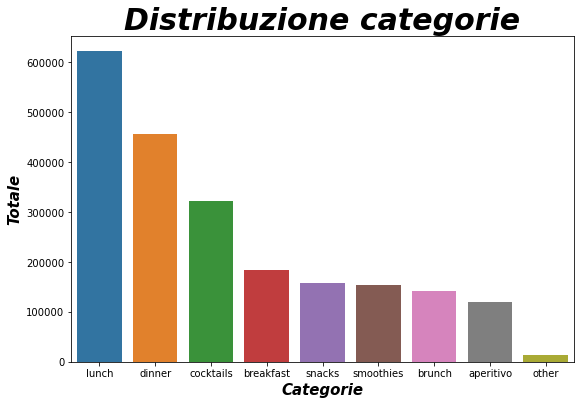

In [18]:
# distribuzione categorie

fig, ax = plt.subplots(1,1, figsize=(9,6))
data = df
sns.countplot(x ='category', data = data, order = df['category'].value_counts().index)

ax.set_title('Distribuzione categorie', size=30, fontstyle='italic', weight=900)
ax.set_xlabel('Categorie', size=15, fontstyle='italic', weight=900)
ax.set_ylabel('Totale', size=15, fontstyle='italic', weight=900)

plt.show()

Anche in questo grafico vediamo come ci sia una preferenza di categorie concentrata sulle ricette tipo "lunch" per poi scendere con ricette tipo "dinner" e "cocktails", seguite dalle restanti.

In [19]:
# top 5 ricette create

df.recipe_id.value_counts()[:5]

2350    7997
2249    7600
7770    5983
7785    4124
2752    3687
Name: recipe_id, dtype: int64

In [20]:
# valori unici per id chef (53 chef in totale)

df.chef_id.nunique()

56

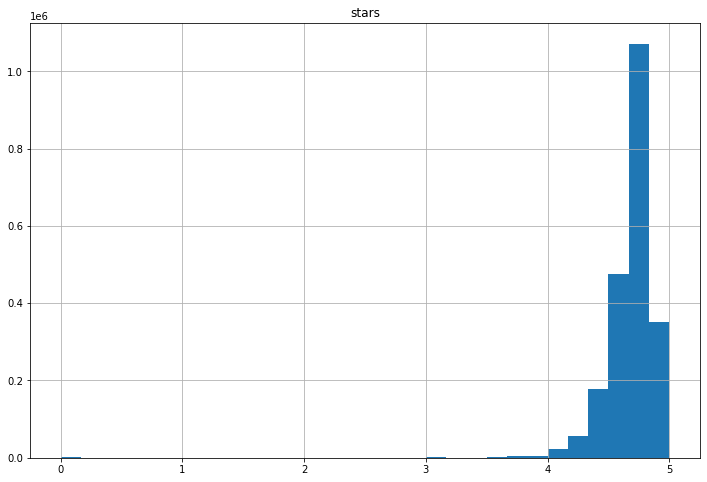

In [21]:
# grafico distribuzione colonna stars
# la maggior parte delle valutazioni sono comprese tra voto 4 e 5 (quasi tutte)

df.hist('stars', bins=30, figsize=(12,8))
plt.show()

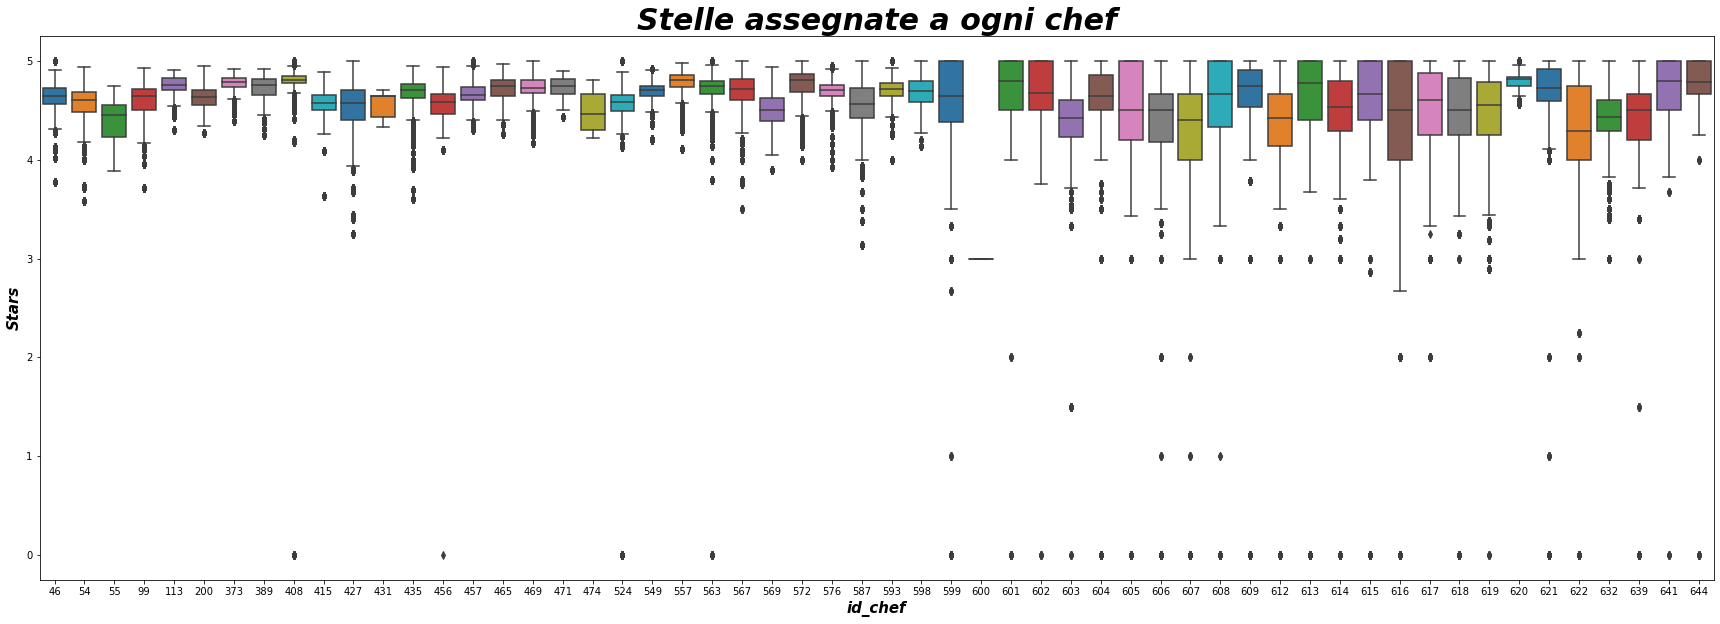

In [22]:
# boxplot stelle assegnate agli chef

fig, ax = plt.subplots(1,1, figsize=(30,10))

sns.boxplot(x='chef_id',y='stars', palette='tab10', data=df)

ax.set_title('Stelle assegnate a ogni chef', size=30, fontstyle='italic', weight=900)
ax.set_xlabel('id_chef', size=15, fontstyle='italic', weight=900)
ax.set_ylabel('Stars', size=15, fontstyle='italic', weight=900)

plt.show()

In [23]:
# correlazione tra voto ricetta (stars) e chef_id.  No correlation

correlation = df["stars"].corr(df["chef_id"])

correlation 

-0.007893287632123418

In totale sono 56 gli chef che insegnano agli utenti ricette nuove e stimolanti. La loro dedizione e passione viene ripagata con stelle di apprezzamento (da 1 a 5).

Gli utenti sembrano apprezzare le ricette proposte, lo notiamo dalla concentrazione di stelle compresa 4 e 5.

Notiamo solo un dato diverso dalla media ,identificato con chef_id 600. Sembra che riceva sempre lo stesso voto (3) dagli utenti. Più avanti lo analizzeremo per scoprie altre informazioni

In [24]:
# top 10 user per ricette pubblicate

df.user_uuid.value_counts()[:10]                  # l'utente più attivo ha un totale di 1940 ricette pubblicate 

83bf5c24-f337-4016-8115-d8db1f9bd93c    1940
b8793bc1-3dea-447d-a7c1-8303576db097    1890
9c229c0f-b1df-4256-abab-56328b8f7701    1626
c10e7b6f-f132-4419-8ba4-5083bdf3e545    1541
65caa359-90a2-4f93-8831-a2099b8ef84d    1483
1d392beb-335a-4e9f-a7de-b43bf7363e61    1373
1010343e-451b-40bc-925a-e91bd388b04b    1247
11a74d62-3a37-4eb4-9350-e77ddbe8d694    1033
6f211701-8b43-46a0-a0a1-6ed2888d36db    1001
740f1680-2318-4445-99a9-314cf755771c     970
Name: user_uuid, dtype: int64

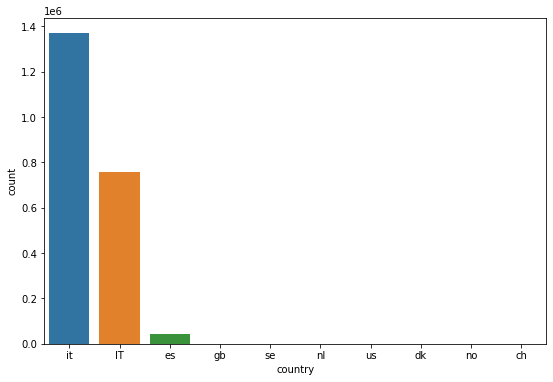

In [25]:
# distribuzione valori country 

fig, ax = plt.subplots(1,1, figsize=(9,6))
data = df
sns.countplot(x ='country', data = data, order = df['country'].value_counts().index)
plt.show()

In [26]:
# change 'IT' into 'it' (lower case)

df['country'] = df['country'].str.lower()

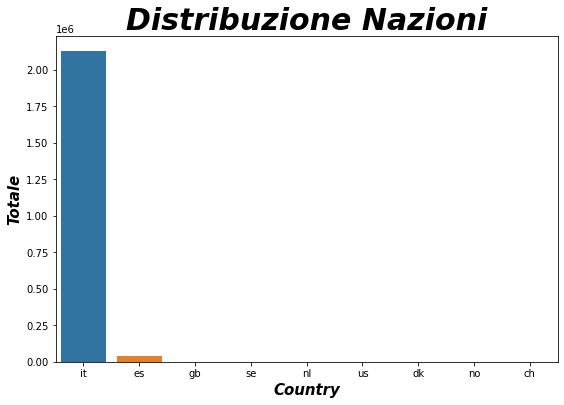

In [27]:
# nuovo grafico distribuzione valori country dopo cambiamento dati 

fig, ax = plt.subplots(1,1, figsize=(9,6))
data = df
sns.countplot(x ='country', data = data, order = df['country'].value_counts().index)

ax.set_title('Distribuzione Nazioni', size=30, fontstyle='italic', weight=900)
ax.set_xlabel('Country', size=15, fontstyle='italic', weight=900)
ax.set_ylabel('Totale', size=15, fontstyle='italic', weight=900)

plt.show()

In [28]:
# percentuale sul totale dei valori

df.country.value_counts(normalize=True).round(2)*100

it    98.0
es     2.0
gb     0.0
se     0.0
nl     0.0
us     0.0
dk     0.0
no     0.0
ch     0.0
Name: country, dtype: float64

In [29]:
# teniamo solo i valori per 'it' ed 'es'. Non abbiamo abbastanza osservazioni per analizzare le altre nazioni

df.country.value_counts()

it    2127245
es      42831
gb         42
se         36
nl         27
us         26
dk          5
no          4
ch          2
Name: country, dtype: int64

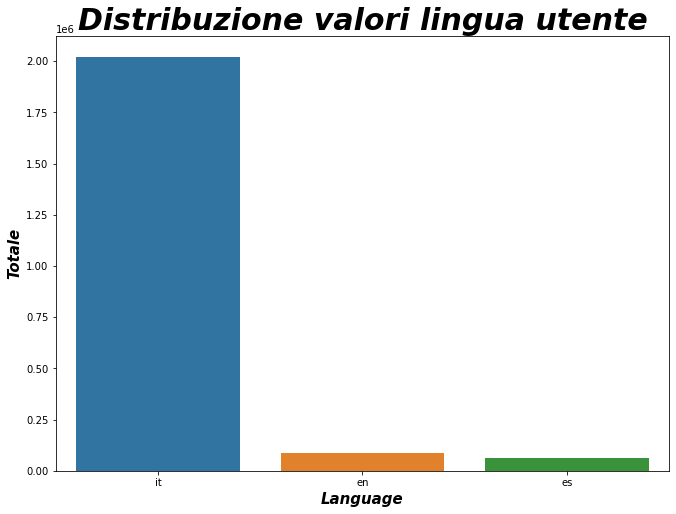

In [30]:
# distribuzione valori 'language'    [lingua utente]

fig, ax = plt.subplots(1,1, figsize=(11,8))
data = df
sns.countplot(x ='language', data = data, order = df['language'].value_counts().index)

ax.set_title('Distribuzione valori lingua utente', size=30, fontstyle='italic', weight=900)
ax.set_xlabel('Language', size=15, fontstyle='italic', weight=900)
ax.set_ylabel('Totale', size=15, fontstyle='italic', weight=900)

plt.show()

L'utenza è chiaramente composta da persone di nazionalità italiana, come dimostrano i grafici dei dati relativi alle variabili 'country' e 'language'.

Tuttavia abbiamo quasi 43k osservazioni di utenti di nazionalità spagnola che meritano di essere analizzati per cercare preferenze o comportamenti specifici di quella fascia di utenza.

Per quanto riguarda le alte nazioni non abbiamo sufficienti dati per ottenere informazioni utili.

In [31]:
# linea temporale analizzata iscrizioni

print(df['subscription_date'].dropna().sort_values().iloc[0])
print(df['subscription_date'].dropna().sort_values().iloc[-1])

2019-11-27
2022-01-09


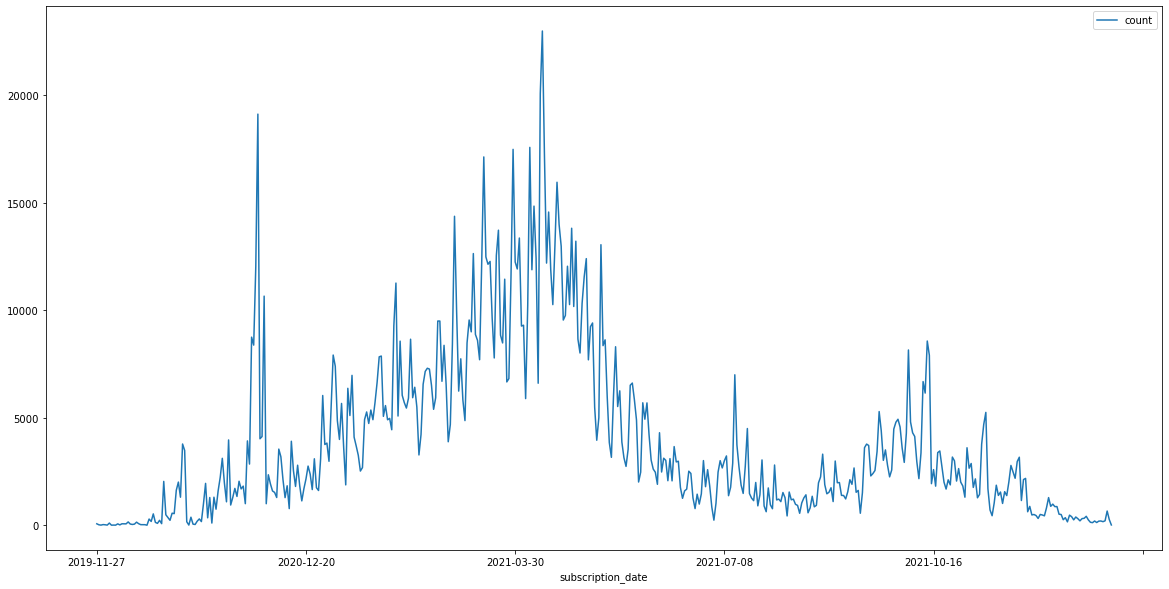

In [32]:
# grafico iscrizioni utenti

grouped_df = df.groupby('subscription_date').size().to_frame("count").reset_index()

grouped_df.plot(kind='line', x='subscription_date', y='count', figsize=(20,10))
plt.show()

In [33]:
# linea temporale analizzata ricette pubblicate

print(df['cooking_date'].dropna().sort_values().iloc[0])
print(df['cooking_date'].dropna().sort_values().iloc[-1])

2021-01-01
2021-12-31


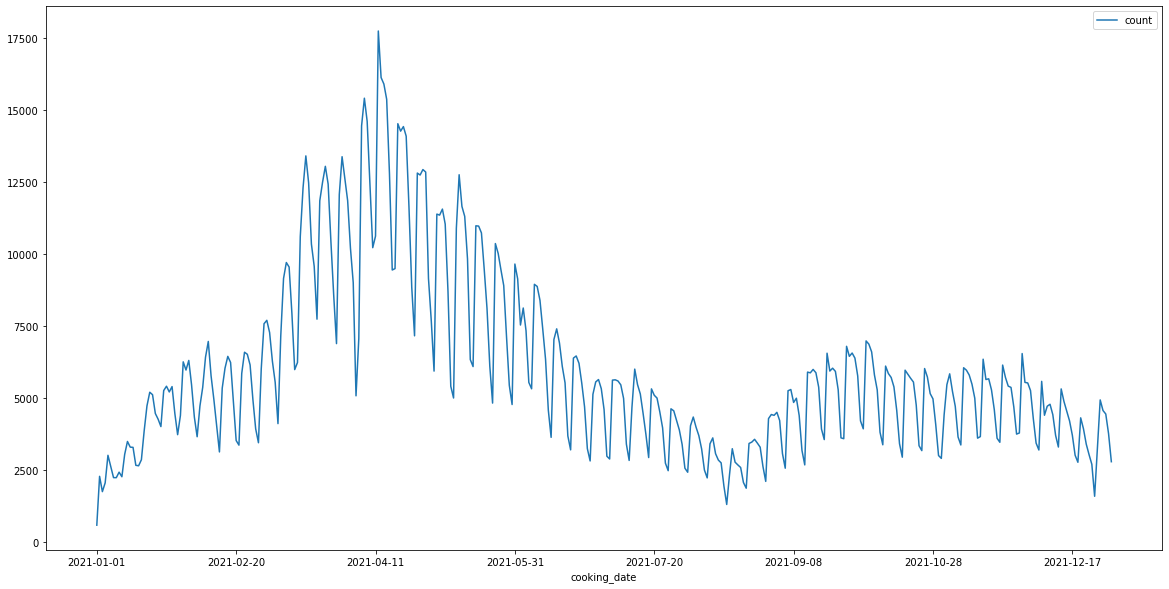

In [34]:
# grafico pubblicazioni ricette

coocking_df = df.groupby('cooking_date').size().to_frame("count").reset_index()

coocking_df.plot(kind='line', x='cooking_date', y='count', figsize=(20,10))
plt.show()

# ci sono dei picchi costanti in cui si pubblica di più 

Le analisi delle azioni degli utenti nel tempo ci aiutano a capire il loro comportamento e l'andamento della applicazione.

Per quanto riguarda le iscrizioni all'applicazione, il periodo che riusciamo ad analizzare con i dati presenti nel dataset inizia dal 27-11-2019 fino al 09-01-2022.

Notiamo un' aumento molto forte fino ad aprile 2021, seguito da un calo altrettanto importante nei mesi successivi.

Discorso simile si applica al numero di ricette pubblicate, il periodo analizzato riguarda tutto l'anno 2021.

Questo grafico mostra un comportamento uguale ripetuto nel tempo, con up and down ripetuti.

Analizzeremo meglio le date per capire in quali giorni della settimana gli utenti pubblicano di più. 

---

---

Dopo una prima visione generale della composizione dei dati, vogliamo osservare nel dettaglio alcune variabili per ottenere più valore dai dati in nostro possesso

Concentreremo le nostre analisi su:
 
 - id_chef 600, per capire il perchè della bassa valutazione rispetto agli altri chef
 
 - analisi comportamento utenti nel tempo 
 
 - analisi comportamento utenti nazionalità spagnola
 
 - analisi miglior utente

## 4.1. Analisi chef

Esaminiamo le variabili relative agli chef

In [35]:
# media stars

round(df['stars'].mean(),2)

4.68

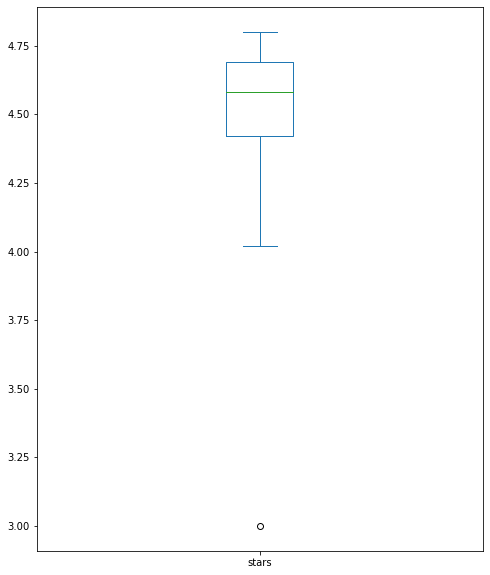

In [36]:
#boxplot media stars

point = df.groupby(['chef_id'])['stars'].mean()
point.sort_values(ascending=False).round(2).plot(kind='box',figsize=(8,10))
plt.show()

Tramite un grafico boxplot riusciamo a visualizzare meglio le stelle ricevute dagli chef per le ricette proposte. Notiamo valori compresi tra 4 e 5, quindi valutazioni molto alte da parte degli utenti, con una media di 4.68 per ogni chef.

L'unico valore diverso lo troviamo con una valutazione di 3 stelle, che come visto in precedenza appartiene all'id 600

In [37]:
#top 10 chef per stelle ricevute media

point = df.groupby(['chef_id'])['stars'].mean()
point.sort_values(ascending=False)[:10].round(2)

chef_id
408    4.80
620    4.80
557    4.78
373    4.77
113    4.76
572    4.75
471    4.74
389    4.73
563    4.73
469    4.73
Name: stars, dtype: float64

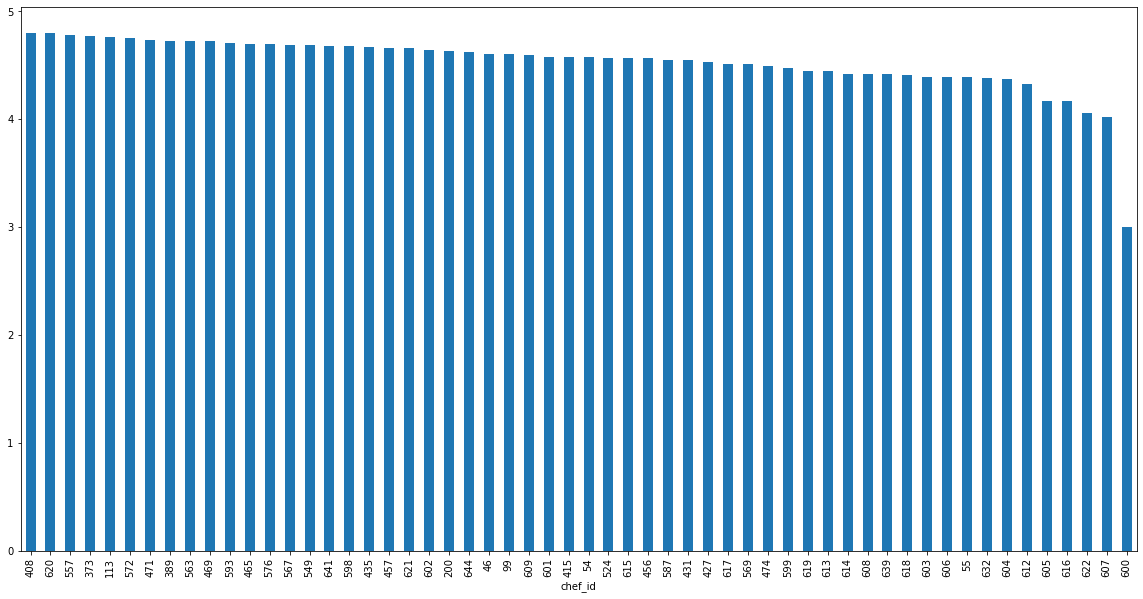

In [38]:
# grafico media chef stelle ricevute

point = df.groupby(['chef_id'])['stars'].mean()
point.sort_values(ascending=False).round(2).plot(kind='bar',figsize=(20,10))
plt.show()

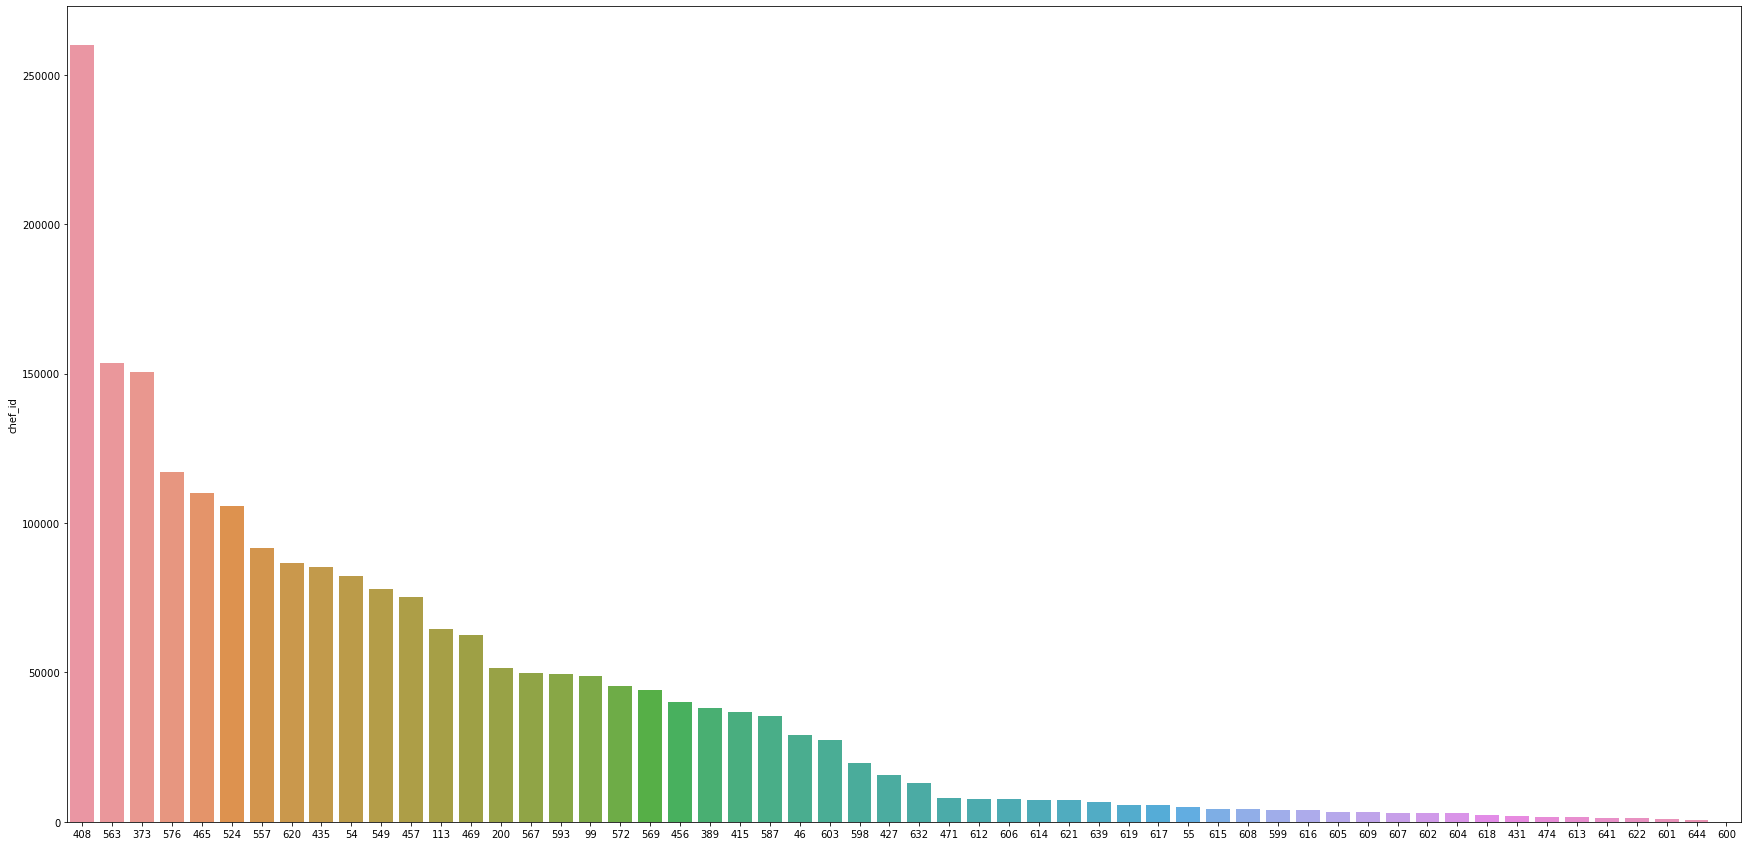

In [39]:
#grafico numero ricette pubblicate dagli chef

plt.figure(figsize=(30,15))
sns.barplot(x=df.chef_id.value_counts().index, y=df.chef_id.value_counts(),order=df.chef_id.value_counts().index)
plt.show()

Il grafico mostra il numero di ricette insegnate da ogni chef. Interessante osservare come l'id 600 è ultimo anche in questa classifica

In [40]:
# media stelle ricevute ordine piccolo > grande (seleziono solo il primo valore )

point = df.groupby(['chef_id'])['stars'].mean()
point.sort_values(ascending=True)[:1].round(2) 

chef_id
600    3.0
Name: stars, dtype: float64

In [41]:
# id 600 last chef per mean star

chef_id_600 = df[df['chef_id']==600]
chef_id_600.head()

,cooking_date,user_uuid,category,chef_id,language,level,challenge_id,country,subscription_date,platform,recipe_id,stars
893509,2021-04-19,fff7200a-8446-4d86-a193-06f254573562,lunch,600,es,NaN,NaN,it,2021-01-17,web,3092,3.0
893510,2021-04-19,efcbce89-4701-4e7e-ae9c-a4fce0dba1d5,lunch,600,es,NaN,NaN,it,2021-04-13,ios,3092,3.0
893511,2021-04-19,185608a5-9d95-40ce-8966-0172dcf7bbd4,lunch,600,es,NaN,NaN,it,2021-03-02,ios,3092,3.0
893512,2021-04-19,999796d8-158a-4c2c-803b-b6644a76839d,lunch,600,es,NaN,NaN,it,NaN,ios,3092,3.0
893513,2021-04-19,10fafdf0-9c4b-40db-878e-c5999741f650,lunch,600,es,NaN,NaN,it,NaN,android,3092,3.0


In [42]:
chef_id_600['stars'].describe()

count    19.0
mean      3.0
std       0.0
min       3.0
25%       3.0
50%       3.0
75%       3.0
max       3.0
Name: stars, dtype: float64

In [86]:
# valori unici recipe_id 

chef_id_600['recipe_id'].nunique()

1

In [87]:
# numero ricette chef_id 600

chef_id_600.country.value_counts()

it    19
Name: country, dtype: int64

In [ ]:
chef_id_600.language.value_counts()

In [90]:
# lingua utenti chef_id 600

chef_id_600.language.value_counts()

es    19
Name: language, dtype: int64

Analizzando le osservazioni relative allo chef con id 600 possiamo affermare che ha un punteggio medio più basso rispetto ai suoi colleghi e ha il minor numero di ricette pubblicate sulla piattaforma.

Solo un tipo di ricetta della categoria 'lunch', valutata sempre con 3 stelle, da utenti di nazionalità italiana che parlano spagnolo.

## 4.2. Analisi temporali

Cerchiamo di capire meglio il comportamento ripetuto nel tempo degli utenti della nostra applicazione

In [46]:
# linea temporale analizzata ricette pubblicate

print(df['cooking_date'].dropna().sort_values().iloc[0])
print(df['cooking_date'].dropna().sort_values().iloc[-1])

2021-01-01
2021-12-31


In [47]:
# converto il tipo di dato in datetime

df['cooking_date'] = pd.to_datetime(df['cooking_date'])

In [48]:
# creo colonna numero ricette postate

df['Recipe_post'] = 1

In [49]:
df.head(3)

,cooking_date,user_uuid,category,chef_id,language,level,challenge_id,country,subscription_date,platform,recipe_id,stars,Recipe_post
0,2021-10-11,34b13067-4a4f-4db4-9446-0031972454b5,other,456,it,NaN,NaN,it,2021-02-09,web,346,0.00,1
1,2021-10-25,cbde47c9-1907-401c-bc7d-eb226ac869dc,dinner,408,it,NaN,NaN,it,2021-10-25,web,1028,4.79,1
2,2021-01-01,89b91726-ad6a-4c7f-a2d8-060cd81e0584,lunch,456,it,NaN,NaN,it,2021-01-01,web,1078,4.65,1


In [50]:
# numero ricette postate ogni giorno

df.groupby(['cooking_date'])['Recipe_post'].sum()[:5]

cooking_date
2021-01-01     594
2021-01-02    2289
2021-01-03    1758
2021-01-04    2062
2021-01-05    3019
Name: Recipe_post, dtype: int64

In [51]:
# media ricette postate ogni giorno

mean = df.groupby(['cooking_date'])['Recipe_post'].sum().mean()
print(f"{mean:.0f}")

5946


In [52]:
# analisi ricette pubblicate da 01 febbraio a 31 marzo

df = df.set_index('cooking_date')

In [53]:
# seleziono il periodo da analizzare

df_febbraio_marzo_2021 = df.sort_index().loc['2021-02-01':'2021-03-31']

In [54]:
df_febbraio_marzo_2021.head(3)

,user_uuid,category,chef_id,language,level,challenge_id,country,subscription_date,platform,recipe_id,stars,Recipe_post
cooking_date,,,,,,,,,,,,
2021-02-01,996f8a70-4f36-4781-a59e-95c48beb23e9,cocktails,408,it,NaN,NaN,it,NaN,android,1517,4.75,1
2021-02-01,6efbb39c-b02c-4114-9be0-e348a5e95375,cocktails,408,it,NaN,NaN,it,2021-01-03,ios,1517,4.75,1
2021-02-01,b0554b90-077d-4629-b18c-b0a86efd6f19,cocktails,408,it,NaN,NaN,it,2020-11-27,ios,1517,4.75,1


In [55]:
g = df_febbraio_marzo_2021.groupby(['cooking_date'])['Recipe_post'].sum()

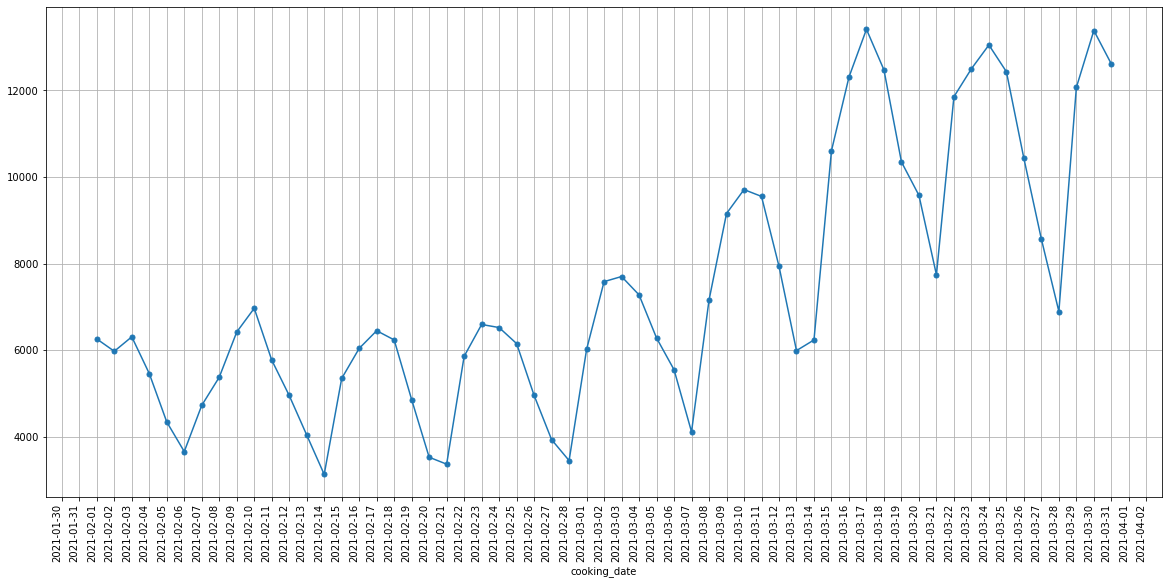

In [58]:
ax = g.plot(x_compat=True,figsize=(20, 10), rot=90, grid=True, marker='.', markersize=10)
ax.xaxis.set_major_locator(mdates.DayLocator())
plt.show()

# up martedì/mercoledì - down weekend

L'applicazione ha 78769 utenti che pubblicano in media 5946 ricette ogni giorno durante l'anno 2021.

Restringendo il periodo di osservazione, il grafico ci permette di analizzare meglio il comportamento giorno per giorno.

Scopriamo così che i giorni in cui vengono pubblicate più ricette sono martedì e mercoledì mentre durante il weekend il traffico cala.

Generalmente il sabato e la domenica vengono usati come giorni di svago. È quindi probabile che gli utenti non prestino attenzione all'applicazione rendendo logico il comportamento visualizzato nel grafico precedente.

## 4.3. Analisi utenti nazionalità spagnola

Cerchiamo di capire se gli utenti che parlano spagnolo possono avere comportamenti simili o differenti rispetto agli utenti che parlano italiano

In [60]:
# selezioniamo solo i valori con 'es' in 'country'

esp = df[df['country'] == 'es']
esp.head()

,user_uuid,category,chef_id,language,level,challenge_id,country,subscription_date,platform,recipe_id,stars,Recipe_post
cooking_date,,,,,,,,,,,,
2021-01-02,88b37dbd-3fa4-4f16-9e93-b085c244abf6,dinner,408,it,NaN,NaN,es,2020-11-29,web,1082,4.89,1
2021-01-03,88b37dbd-3fa4-4f16-9e93-b085c244abf6,cocktails,549,it,NaN,NaN,es,2020-11-29,web,1089,4.64,1
2021-01-03,88b37dbd-3fa4-4f16-9e93-b085c244abf6,lunch,549,it,NaN,NaN,es,2020-11-29,web,1090,4.79,1
2021-01-03,88b37dbd-3fa4-4f16-9e93-b085c244abf6,cocktails,408,it,NaN,NaN,es,2020-11-29,ios,1094,4.84,1
2021-01-07,88b37dbd-3fa4-4f16-9e93-b085c244abf6,dinner,373,it,NaN,NaN,es,2020-11-29,ios,1152,4.75,1


In [61]:
# numero utenti spagna

esp.user_uuid.nunique()

4605

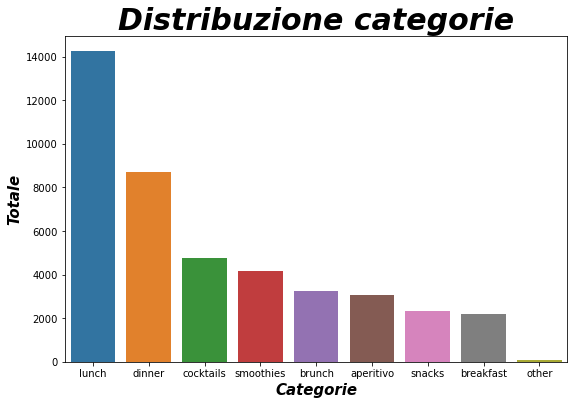

In [93]:
# categorie di ricette utenti lingua spagnola

fig, ax = plt.subplots(1,1, figsize=(9,6))
data = esp
sns.countplot(x ='category', data = data, order = esp['category'].value_counts().index)

ax.set_title('Distribuzione categorie', size=30, fontstyle='italic', weight=900)
ax.set_xlabel('Categorie', size=15, fontstyle='italic', weight=900)
ax.set_ylabel('Totale', size=15, fontstyle='italic', weight=900)

plt.show()

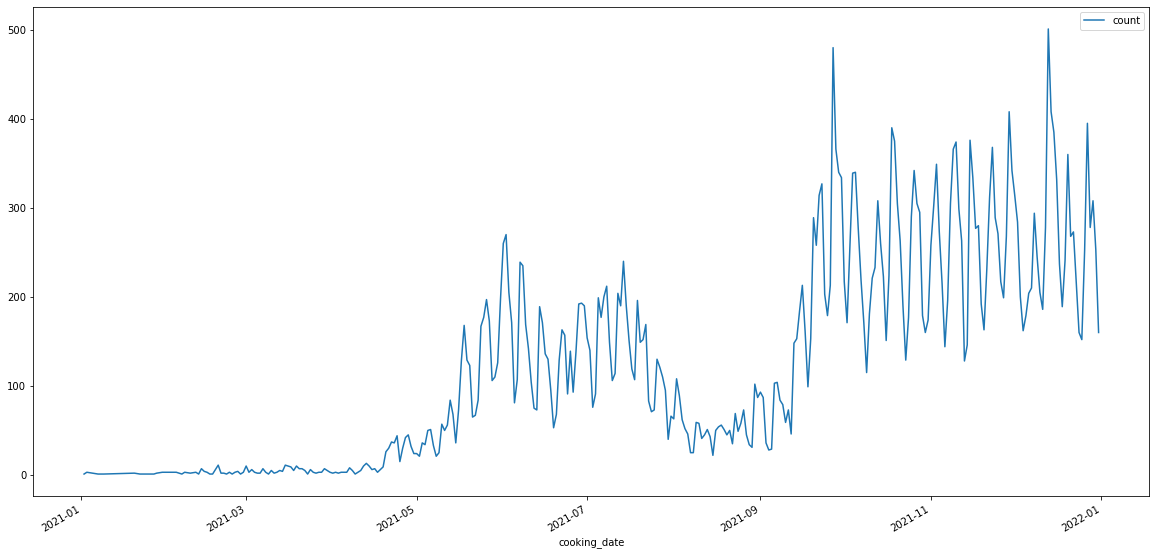

In [63]:
#grafico ricette postate utenti spagnoli

grouped_df = esp.groupby('cooking_date').size().to_frame("count").reset_index()

grouped_df.plot(kind='line', x='cooking_date', y='count', figsize=(20,10))
plt.show()

In [65]:
# ricette pubblicate per ogni data

esp.groupby(['cooking_date'])['Recipe_post'].sum()[:5]

cooking_date
2021-01-02    1
2021-01-03    3
2021-01-07    1
2021-01-09    1
2021-01-20    2
Name: Recipe_post, dtype: int64

In [66]:
# media ricette postate utenti spagnoli

mean = esp.groupby(['cooking_date'])['Recipe_post'].sum().mean()
print(f"{mean:.0f}")

126


In [68]:
# prendiamo in esame l'ultimo quarto dell'anno 2021

df_q4_2021 = esp.sort_index().loc['2021-08-01':'2021-12-31']

In [69]:
g = df_q4_2021.groupby(['cooking_date'])['Recipe_post'].sum()

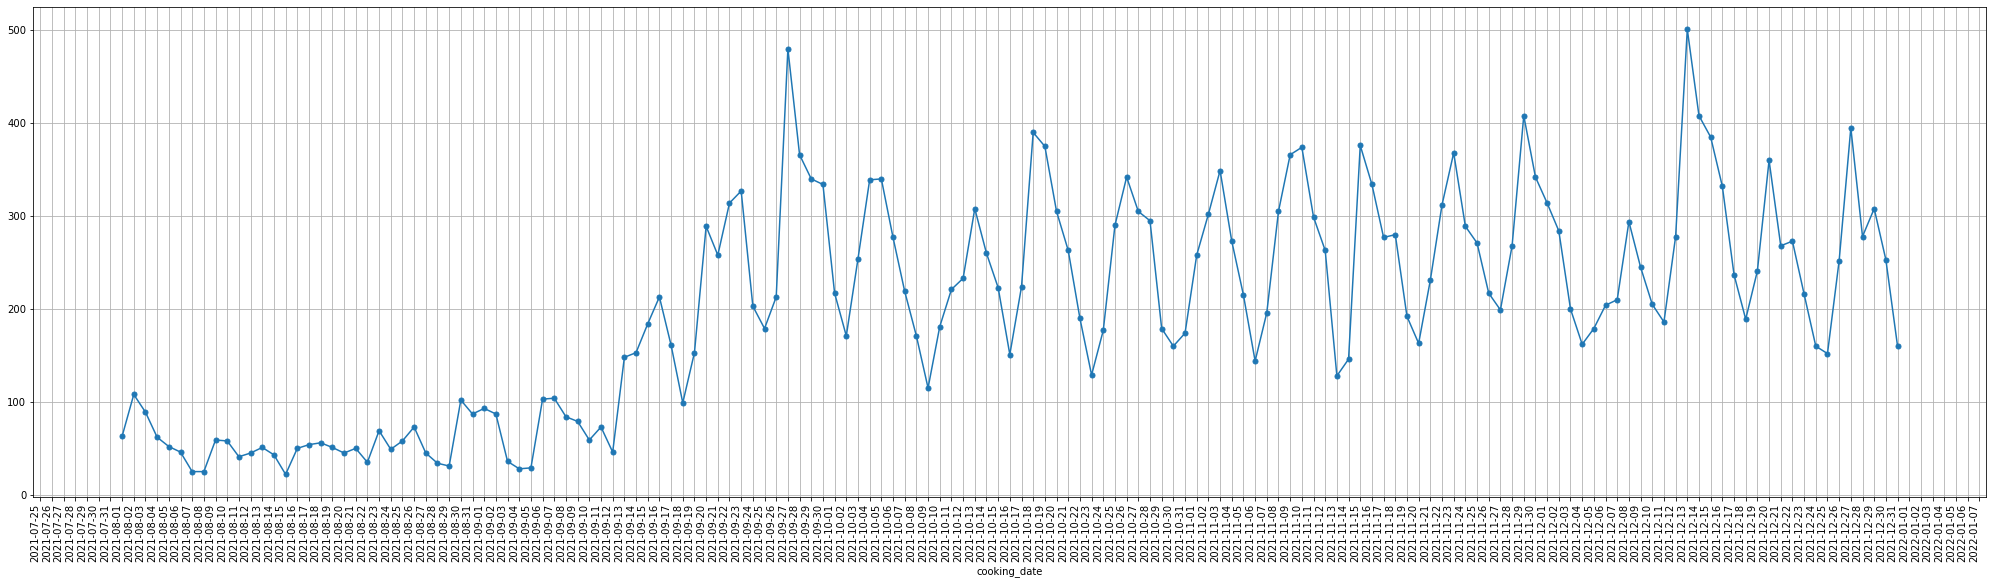

In [70]:
ax = g.plot(x_compat=True,figsize=(35, 10), rot=90, grid=True, marker='.', markersize=10)
ax.xaxis.set_major_locator(mdates.DayLocator())
plt.show()

# spike martedì/mercoledì - down weekend

Nell'applicazione sono presenti 4605 utenti che parlano spagonlo e la categoria delle ricette smoothies è più gradita rispetto alle statistiche esaminate in precedenza

Dopo un primo periodo di pubblicazioni sporadiche, iniziano ad aumentare le presenze per questa tipologia di utenti. Il trend è positivo con comportamenti simili agli altri utenti.

Infatti analizzando un periodo più ristretto, il grafico ci permmette di sapere esattamente i giorni in cui gli utenti preferiscono pubblicare le loro ricette. E come visto in precedenza, anche qui il weekend si conferma un momento di bassa afluenza sull'applicazione, mentre i giorni di punta sono martedì e mercoledì.

## 4.4. Analisi miglior utente

In [71]:
# top 5 user per ricette postate. Selezioniamo il primo e facciamo delle analisi

df.user_uuid.value_counts()[:5]  

83bf5c24-f337-4016-8115-d8db1f9bd93c    1940
b8793bc1-3dea-447d-a7c1-8303576db097    1890
9c229c0f-b1df-4256-abab-56328b8f7701    1626
c10e7b6f-f132-4419-8ba4-5083bdf3e545    1541
65caa359-90a2-4f93-8831-a2099b8ef84d    1483
Name: user_uuid, dtype: int64

In [72]:
# seleziono user id primo utente per post pubblicati

df_utente = df[df['user_uuid']=='83bf5c24-f337-4016-8115-d8db1f9bd93c']
df_utente.head()

,user_uuid,category,chef_id,language,level,challenge_id,country,subscription_date,platform,recipe_id,stars,Recipe_post
cooking_date,,,,,,,,,,,,
2021-01-03,83bf5c24-f337-4016-8115-d8db1f9bd93c,cocktails,549,it,NaN,NaN,it,2020-11-24,android,1089,4.64,1
2021-01-03,83bf5c24-f337-4016-8115-d8db1f9bd93c,lunch,549,it,NaN,NaN,it,2020-11-24,android,1090,4.79,1
2021-01-03,83bf5c24-f337-4016-8115-d8db1f9bd93c,smoothies,557,it,NaN,NaN,it,2020-11-24,android,1091,4.67,1
2021-01-04,83bf5c24-f337-4016-8115-d8db1f9bd93c,dinner,524,it,NaN,NaN,it,2020-11-24,android,1105,4.75,1
2021-01-04,83bf5c24-f337-4016-8115-d8db1f9bd93c,breakfast,563,it,NaN,NaN,it,2020-11-24,android,1109,4.76,1


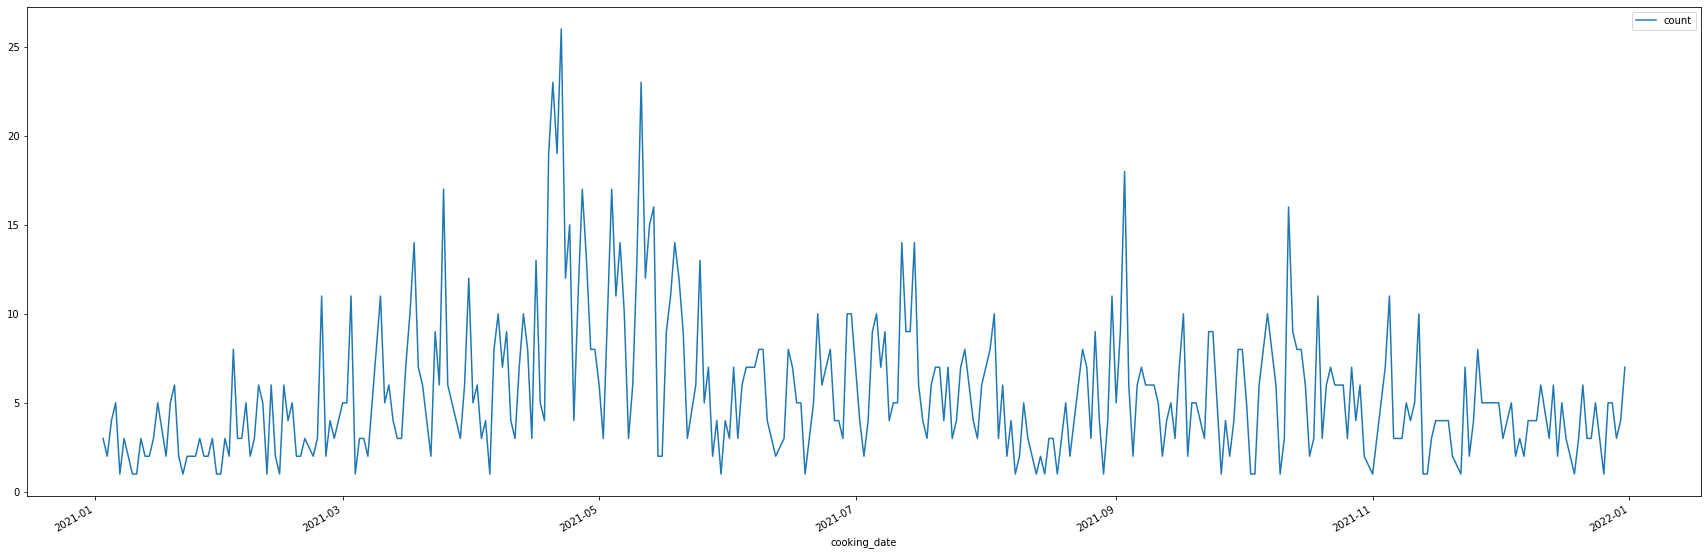

In [73]:
# grafico ricette postate dall'utente

coocking_df = df_utente.groupby('cooking_date').size().to_frame("count").reset_index()

coocking_df.plot(kind='line', x='cooking_date', y='count', figsize=(30,10))
plt.show()

In [74]:
df_utente.shape

(1940, 12)

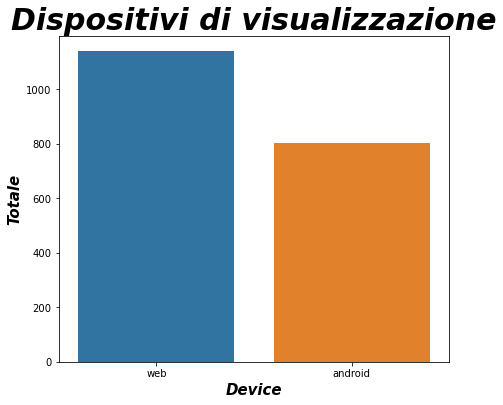

In [98]:
# countplot platform (dispositivi di visualizzazione delle ricette)

fig, ax = plt.subplots(1,1, figsize=(7,6))
data = df_utente
sns.countplot(x ='platform', data = data, order = df_utente['platform'].value_counts().index)

ax.set_title('Dispositivi di visualizzazione', size=30, fontstyle='italic', weight=900)
ax.set_xlabel('Device', size=15, fontstyle='italic', weight=900)
ax.set_ylabel('Totale', size=15, fontstyle='italic', weight=900)

plt.show()

In [75]:
# media stelle assegnate

df_utente.stars.mean()

4.639850515463929

In [76]:
# trovo quante ricette ha ostato ogni giorno

df_utente.groupby(['cooking_date'])['Recipe_post'].sum()[:5]

cooking_date
2021-01-03    3
2021-01-04    2
2021-01-05    4
2021-01-06    5
2021-01-07    1
Name: Recipe_post, dtype: int64

In [77]:
# media ricette postate da best utente 

mean = round(df_utente.groupby(['cooking_date'])['Recipe_post'].sum().mean(),2)
mean

5.62

In [78]:
# seleziono intervallo di tempo per analisi

df_aprile_maggio = df_utente.loc['2021-04-01':'2021-05-31']

In [79]:
# ottengo il numero di ricette postate divise per data

g = df_aprile_maggio.groupby(['cooking_date'])['Recipe_post'].sum()

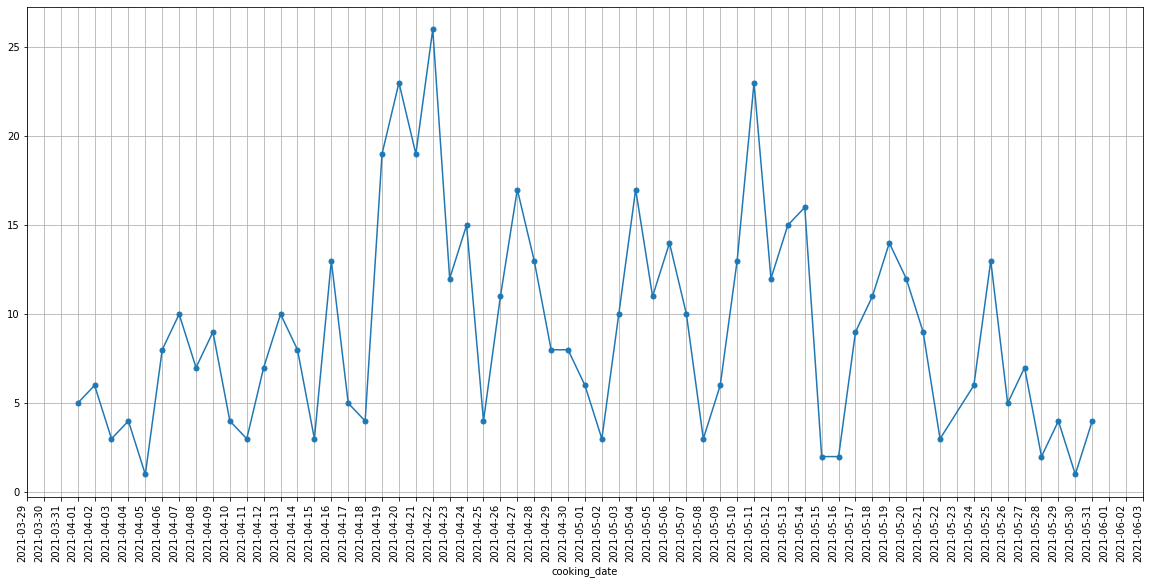

In [80]:
# grafico ricette postate 

ax = g.plot(x_compat=True,figsize=(20, 10), rot=90, grid=True, marker='.', markersize=10)
ax.xaxis.set_major_locator(mdates.DayLocator())
plt.show()

# spike martedì/mercoledì - down weekend

Questo utente sembra particolarmente contento dell'applicazione. Oltre ad assegrare un punteggio alto alle ricette, durante il 2021 ha postato in media quasi 6 ricette al giorno! 

I suoi canali preferiti per visualizzare le ricette sono PC e sistemi android e come ormai abbiamo osservato dalle analisi temporali, anche questo utente utilizza maggiormente l'applicazione durante i giorni di martedì e mercoledì

## 5. Conclusioni

L'applicazione sembra aver perso la capacità di attirare nuovi utenti. **La bolla delle iscrizioni è scoppiata** e dopo una crescita rapida di nuovi utenti, un declino altrettanto forte è avvenuto nell'ultimo periodo.

Stesso discorso per le ricette pubblicate. Le analisi hanno mostrato un comportamento simile al trend delle iscrizioni, **con un incremento iniziale seguito da una discesa improvvisa**.

Eppure **gli utenti sembrano essere soddisfatti** dalle ricette proposte. Il voto ricevuto dagli chef ha una media molto alta, indice di un buon operato.

L'utenza in **lingua spagnola** merita un approfondimento, sembrano molto attivi e il numero di ricette postate ha un buon andamento. 

Potrebbero essere loro a cambiare il trend generale dell'applicazione.